In [14]:
import numpy as np
import math
from simpleai.search import SearchProblem, breadth_first, depth_first, uniform_cost, astar

In [15]:
mars_map = np.load('mars_map.npy')
NR, NC = mars_map.shape
SCALE = 10.0174

In [16]:
def get_row(nr: int, y: int, scale: float) -> int:
    """
    Returns the row number inside the mars map for a given 'y'
    coordinate.
    ---
    nr: total number of rows inside the mars map
    y: the y coordinate we want to find
    scale: the scale at which the map is scaled
    ---
    Returns -> int representing the row at which the 'y' coordinate is found
    """
    return nr - round(y / scale)

def get_column(x: int, scale: float) -> int:
    """
    Returns the column number inside the mars map for a given 'x'
    coordinate.
    ---
    x: the x coordinate we want to find
    scale: the scale at which the map is scaled
    1
    ---
    Returns -> int representing the row at which the 'x' coordinate is found
    """
    return round(x / scale)

In [17]:
# Defining Search Problem
class Rover(SearchProblem):
    def __init__(self, mars_map, start_point, end_point):
        self.map = mars_map
        self.initial_state = (
            get_row(NR, start_point[1], SCALE),
            get_column(start_point[0], SCALE)
        )
        self.goal_position = (
            get_row(NR, end_point[1], SCALE),
            get_column(end_point[0], SCALE),
        )
    def actions(self, state):
        open_sides = []
        row = state[0]
        column = state[1]
        current_height = self.map[row][column]
        # UL
        if self.map[row - 1][column - 1] != -1 and abs(self.map[row - 1][column - 1] - current_height) < .25:
            open_sides.append((row - 1, column - 1))
        # UU
        if self.map[row - 1][column] != -1 and abs(self.map[row - 1][column] - current_height) < .25:
            open_sides.append((row - 1, column))
        # UR
        if self.map[row - 1][column + 1] != -1 and abs(self.map[row - 1][column + 1] - current_height) < .25:
            open_sides.append((row - 1, column + 1))
        # LL
        if self.map[row][column - 1] != -1 and abs(self.map[row][column - 1] - current_height) < .25:
            open_sides.append((row, column - 1))
        # RR
        if self.map[row][column + 1] != -1 and abs(self.map[row][column + 1] - current_height) < .25:
            open_sides.append((row, column + 1))
        # DL
        if self.map[row + 1][column - 1] != -1 and abs(self.map[row + 1][column - 1] - current_height) < .25:
            open_sides.append((row + 1, column - 1))
        # DD
        if self.map[row + 1][column] != -1 and abs(self.map[row + 1][column] - current_height) < .25:
            open_sides.append((row + 1, column))
        # DR
        if self.map[row + 1][column + 1] != -1 and abs(self.map[row + 1][column + 1] - current_height) < .25:
            open_sides.append((row + 1, column + 1))
        
        return open_sides
    
    def result(self, state, action):
        state = action
        return state
    
    def is_goal(self, state):
        return state == self.goal_position

    def heuristic(self, state):
        return math.sqrt(
            ((self.goal_position[0] - state[0]) ** 2) + ((self.goal_position[1] - state[1]) ** 2)
            )


In [18]:
# Starting and ending points
start_x = 2850
start_y = 6400
end_x = 3150
end_y = 6800

In [19]:
from typing import List

In [20]:
 def calculate_distance(points: List) -> float:
    """
    Calculates the distance traveled from a list of points.
    3
    """
    distance = 0
    
    for i in range(len(points) - 1):
        x1 = points[i][1][0]
        x2 = points[i + 1][1][0]
        y1 = points[i][1][1]
        y2 = points[i + 1][1][1]
        
        distance += math.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2))

    return distance * SCALE # Multiplied by scale to return to meters

In [21]:
problem = Rover(mars_map=mars_map,
                start_point=(start_x, start_y),
                end_point=(end_x, end_y))

In [22]:
breadth_result = breadth_first(problem, graph_search=True)

In [23]:
print(breadth_distance := calculate_distance(breadth_result.path()))

3587.4296957056717


In [ ]:
# depth_result = depth_first(problem, graph_search=True)

In [24]:
uniform_result = uniform_cost(problem, graph_search=True)

In [25]:
print(uniform_distance := calculate_distance(uniform_result.path()))

3612.3257533439705


In [26]:
astar_result = astar(problem, graph_search=True)

In [27]:
 print(astar_distance := calculate_distance(astar_result.path()))


3512.7415227907786


In [30]:
# Function to create list of points
def get_points(points: List) -> List:
    """
    From the result of the search, we want a nicer, cleaner list
    """
    clean_points = []
    for i in range(len(points) - 1):
        x = points[i][1][1]
        y = points[i][1][0]
        clean_points.append((x, y))
    return clean_points

In [31]:
breadth_points = get_points(breadth_result.path())
uniform_points = get_points(uniform_result.path())
astar_points = get_points(astar_result.path())

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

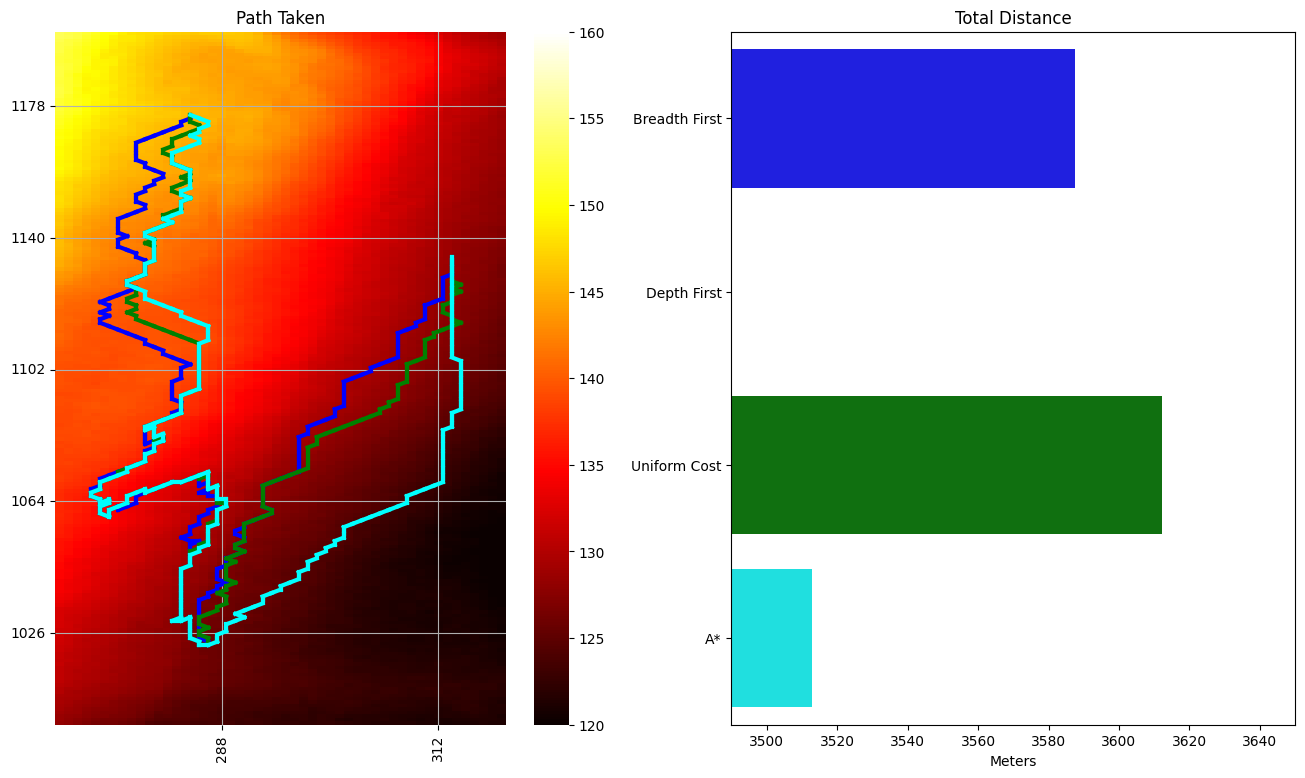

In [33]:
fig = plt.figure(figsize=(16, 9))

# Map and paths taken
ax1 = fig.add_subplot(121)
ax1.grid(visible=True)
ax1.set_title("Path Taken")

# Surface map
sns.heatmap(mars_map, cmap='hot', vmin=120, vmax=160, ax=ax1)
ax1.set_xlim(270, 320)
ax1.set_ylim(1000, 1200)

# Breadth Path
for i in range(len(breadth_points) - 1):
    plt.plot([breadth_points[i][0], breadth_points[i + 1][0]],
    [breadth_points[i][1], breadth_points[i + 1][1]],
    color='blue', lw=3)

# Uniform Path
for i in range(len(uniform_points) - 1):
    plt.plot([uniform_points[i][0], uniform_points[i + 1][0]],
    [uniform_points[i][1], uniform_points[i + 1][1]],
    color='green', lw=3)

# A* Path
for i in range(len(astar_points) - 1):
    plt.plot([astar_points[i][0], astar_points[i + 1][0]],
    [astar_points[i][1], astar_points[i + 1][1]],
    color='cyan', lw=3)

# Results
colors = ['blue', 'blue', 'green', 'cyan']
ax2 = fig.add_subplot(122)
ax2.set_xlim(3490, 3650)
ax2.set_title("Total Distance")
ax2.set_xlabel("Meters")
sns.barplot(
    x=[breadth_distance, 0, uniform_distance, astar_distance],
    y=["Breadth First", "Depth First", "Uniform Cost", "A*"],
    ax=ax2, palette=colors
);

In [34]:
# Starting and ending points under 500m apart
start_x_500 = 6000
start_y_500 = 10000
end_x_500 = 6050
end_y_500 = 10300

problem = Rover(mars_map=mars_map,
                start_point=(start_x_500, start_y_500),
                end_point=(end_x_500, end_y_500))


In [36]:
astar_500_result = astar(problem, graph_search=True)

In [37]:
astar_500_distance = calculate_distance(astar_500_result.path())
print(f"Total distance: {astar_500_distance}")
astar_500_points = get_points(astar_500_result.path())

Total distance: 354.4634582163112


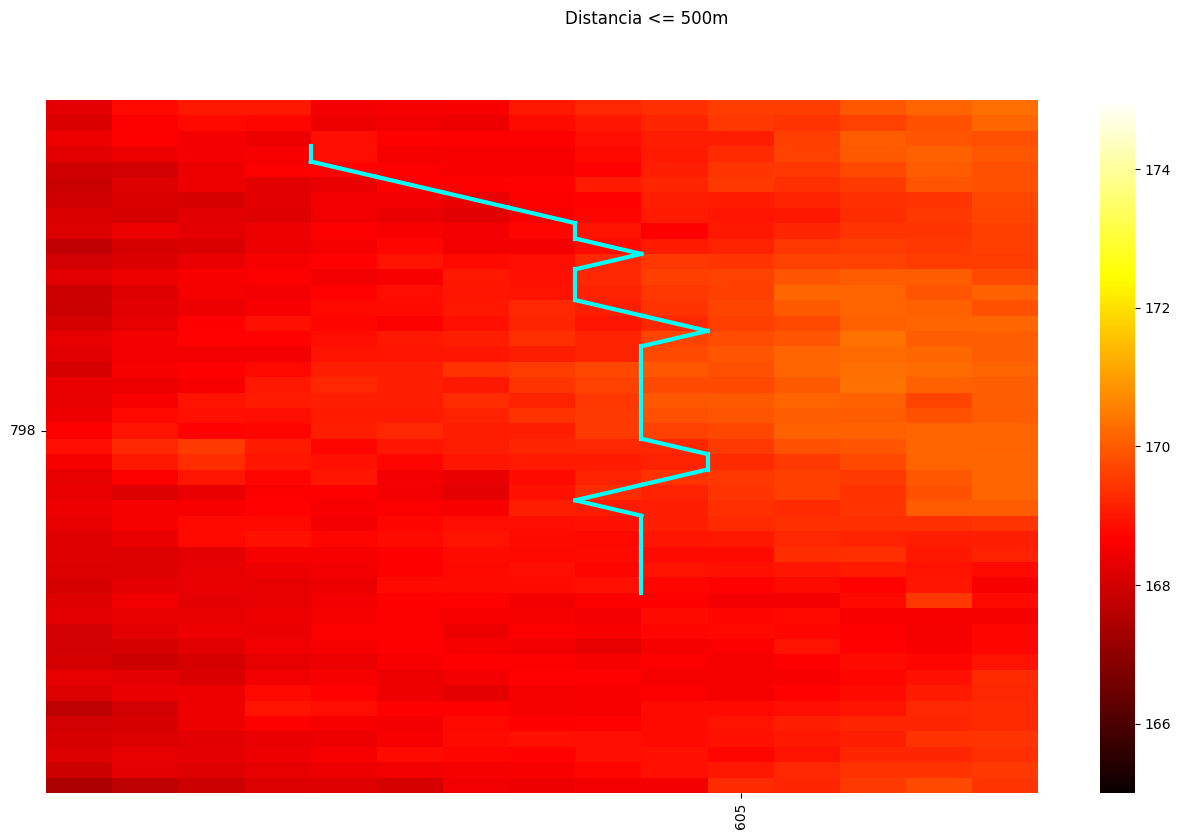

In [39]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
sns.heatmap(mars_map, cmap='hot', vmin=165, vmax=175, ax=ax)
ax.set_xlim(595, 610)
ax.set_ylim(775, 820)
fig.suptitle('Distancia <= 500m')

# A* Path
for i in range(len(astar_500_points) - 1):
    plt.plot([astar_500_points[i][0], astar_500_points[i + 1][0]],
            [astar_500_points[i][1], astar_500_points[i + 1][1]],
            color='cyan', lw=3)

In [41]:
# Starting and ending points over 1000m apart
start_x_1000 = 7000
start_y_1000 = 2500
end_x_1000 = 6000
end_y_1000 = 900

In [42]:
problem = Rover(mars_map=mars_map,
                start_point=(start_x_1000, start_y_1000),
                end_point=(end_x_1000, end_y_1000))


In [43]:
astar_1000_result = astar(problem, graph_search=True)

In [45]:
astar_1000_distance = calculate_distance(astar_1000_result.path())
print(f"Total distance: {astar_1000_distance}")
astar_1000_points = get_points(astar_1000_result.path());

Total distance: 5033.149390255321


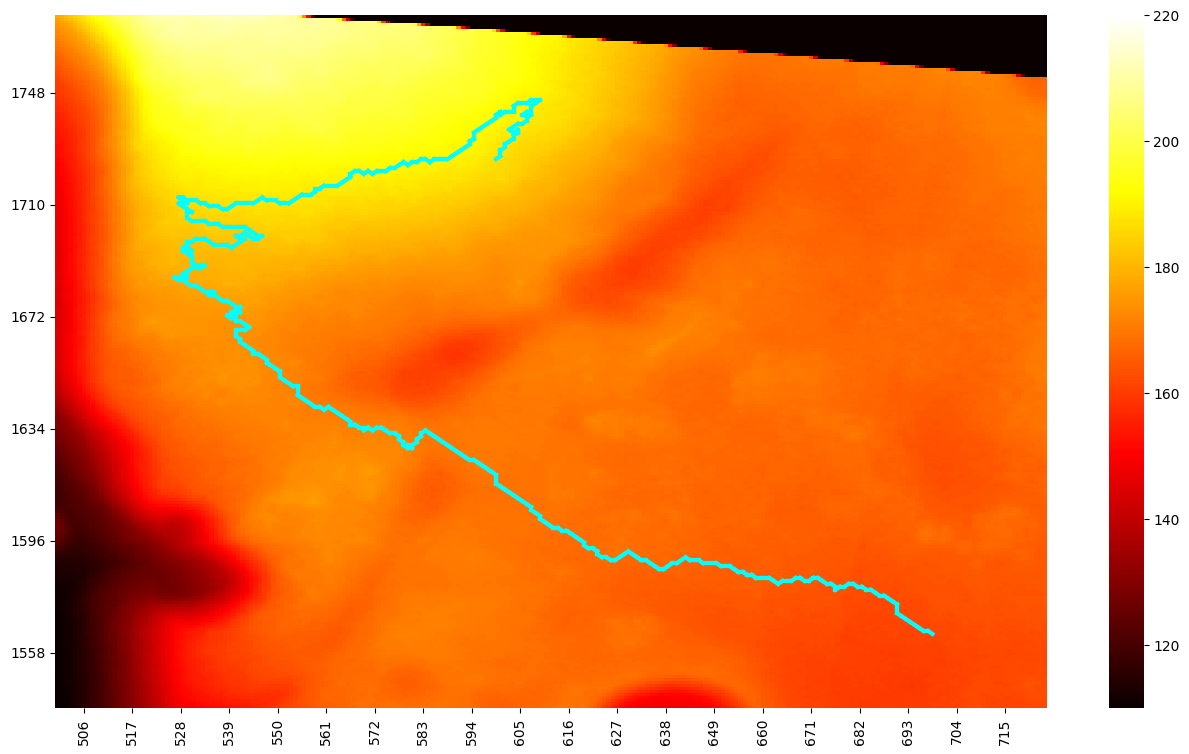

In [46]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
sns.heatmap(mars_map, cmap='hot', vmin=110, vmax=220, ax=ax)
ax.set_xlim(500, 725)
ax.set_ylim(1540, 1775)

# A* Path
for i in range(len(astar_1000_points) - 1):
    plt.plot([astar_1000_points[i][0], astar_1000_points[i + 1][0]],
            [astar_1000_points[i][1], astar_1000_points[i + 1][1]],
            color='cyan', lw=3)

In [47]:
# Starting and ending points over 10000m apart
start_x_10000 = 7500
start_y_10000 = 700
end_x_10000 = 7600
end_y_10000 = 10700

In [48]:
problem = Rover(mars_map=mars_map,
                start_point=(start_x_10000, start_y_10000),
                end_point=(end_x_10000, end_y_10000))


In [49]:
astar_10000_result = astar(problem, graph_search=True)

In [50]:
try:
    astar_10000_distance = calculate_distance(astar_10000_result.path())
    astar_10000_points = get_points(astar_10000_result.path())
except AttributeError:
    print("No se encontró una ruta")

No se encontró una ruta
